In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, validation_curve, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [88]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [96]:
data['quality'].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

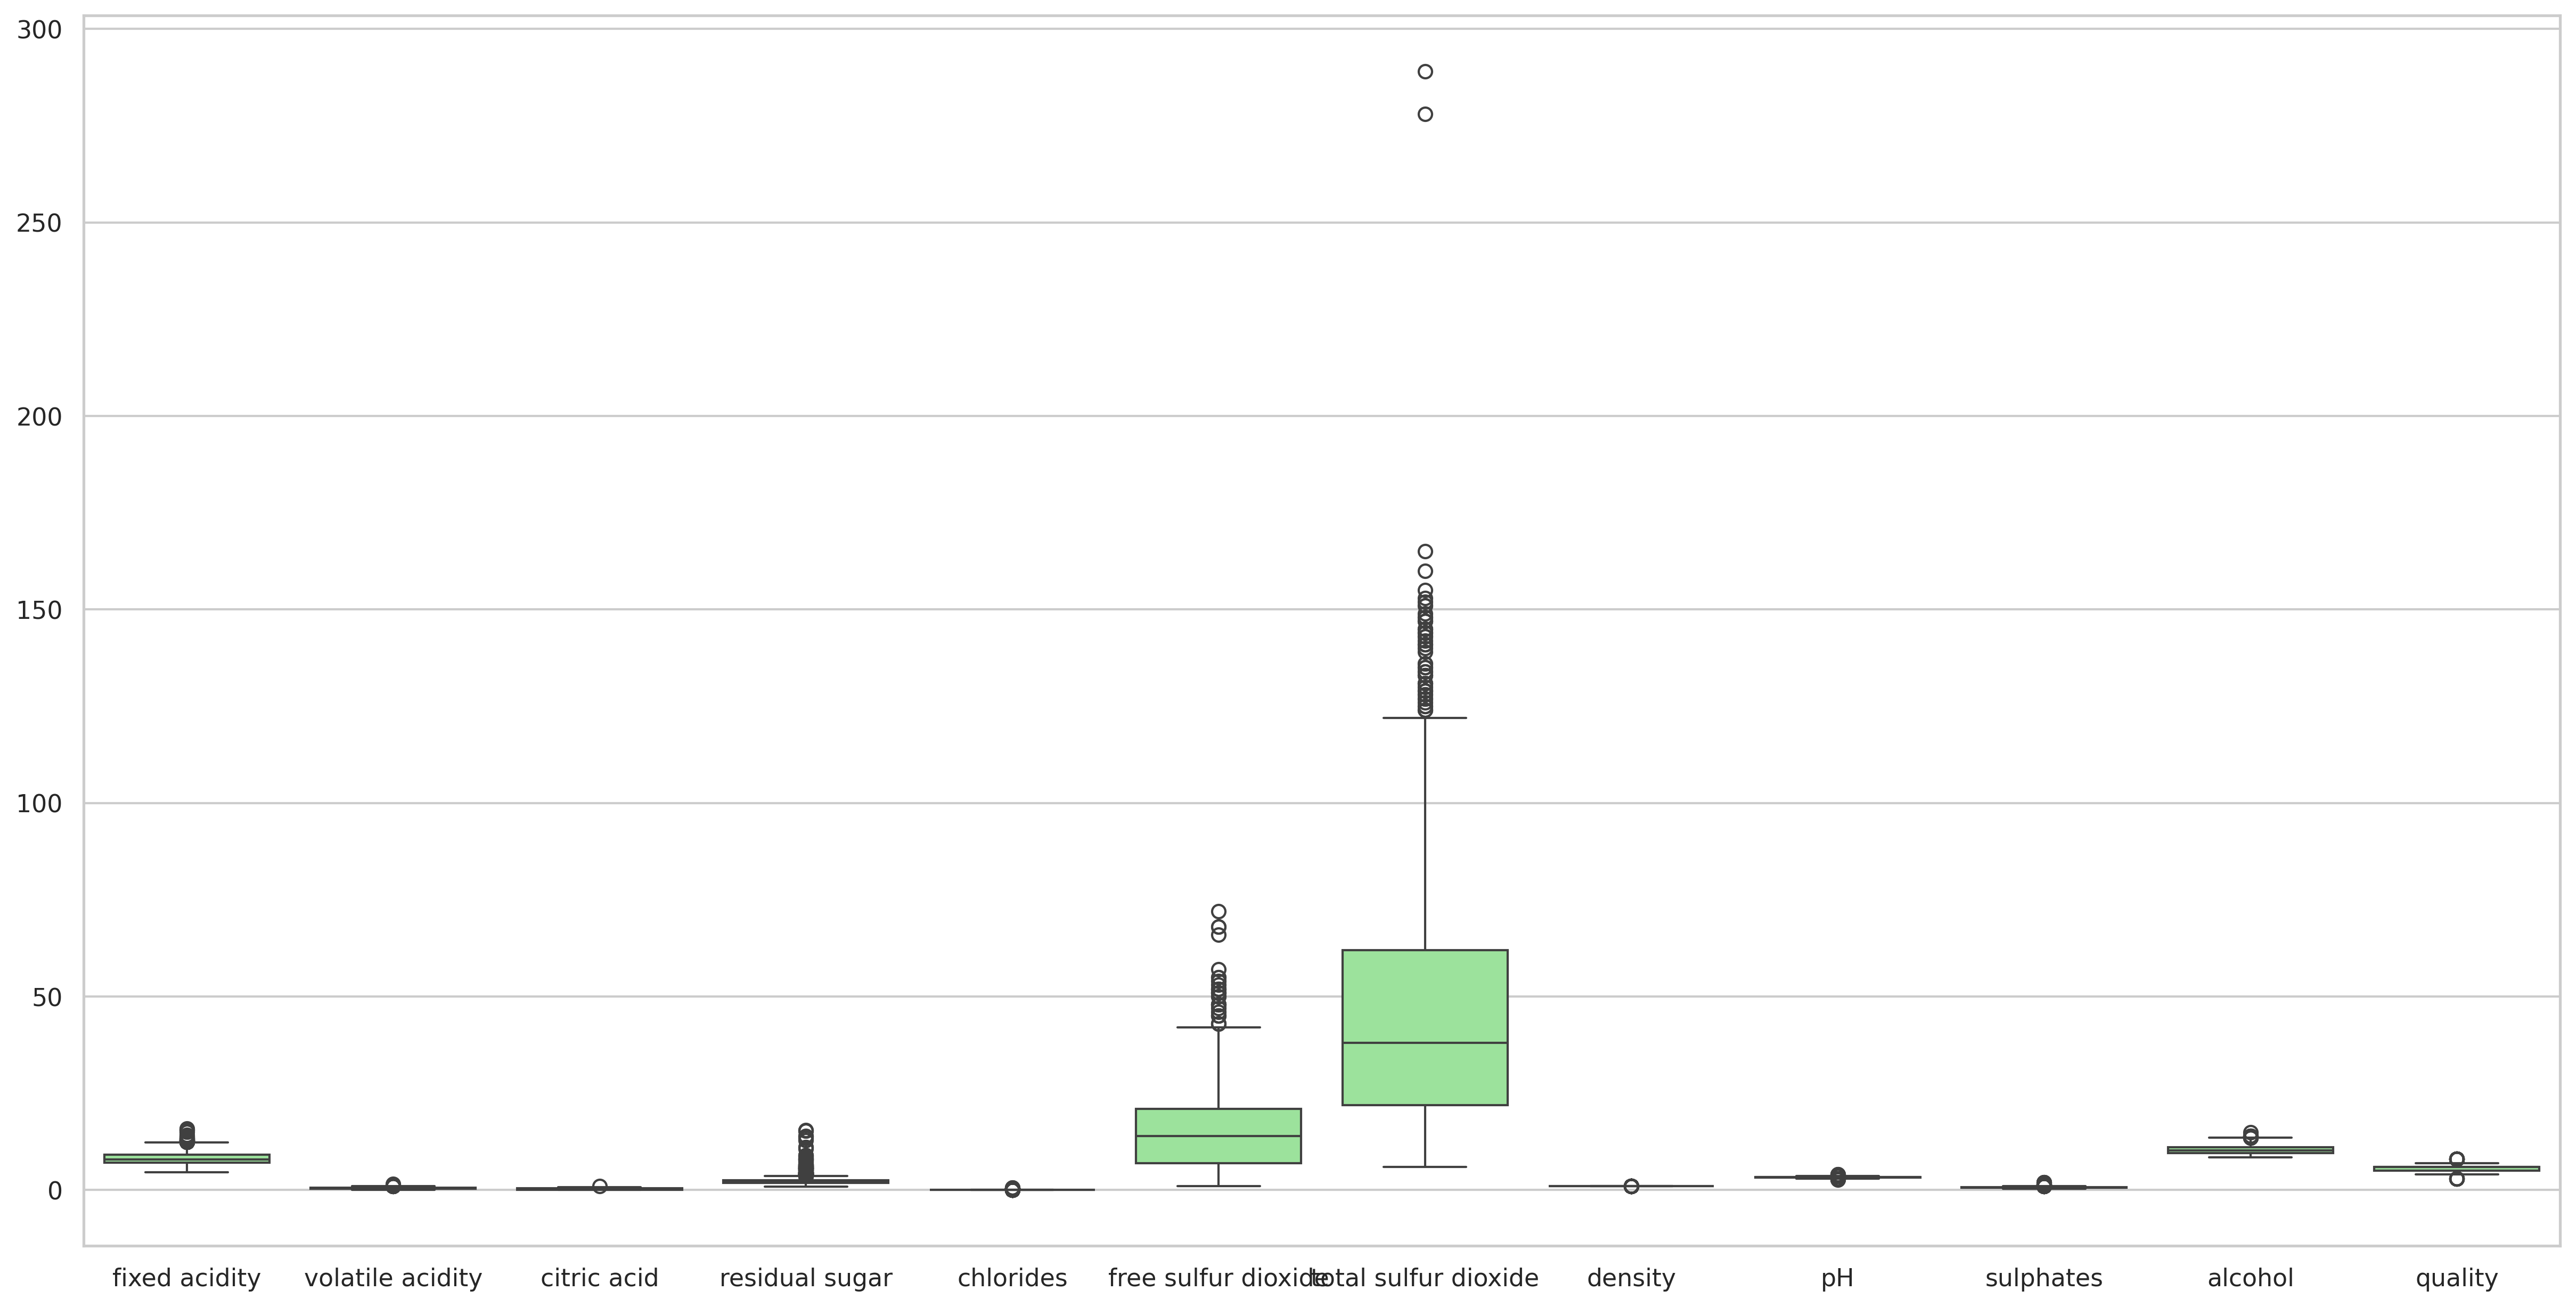

In [124]:
sns.set_theme(style="whitegrid", palette="pastel")

# Create a larger figure to accommodate the size of the plot
plt.figure(figsize=(20, 10), dpi=300)
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(data=data, color='lightgreen')
ax.grid(False, axis='y')
plt.show()


In [98]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

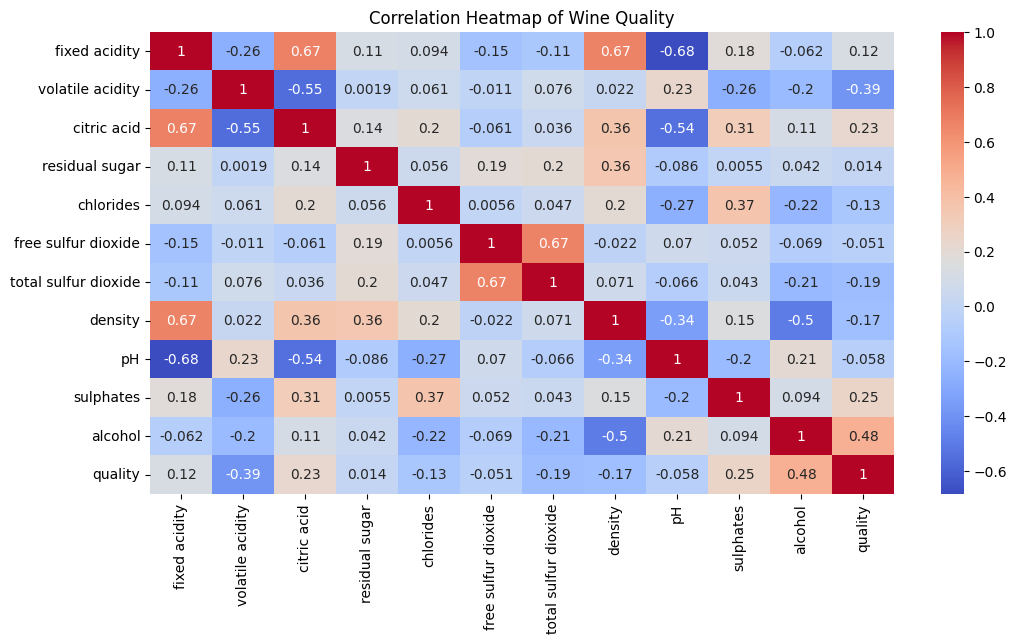

In [99]:
plt.figure(figsize=(12, 6))
plt.title('Correlation Heatmap of Wine Quality')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling Data in Machine Learning
- Scaling is a technique used in machine learning to standardize the range of independent variables or features of data. In simpler terms, scaling ensures that all the data in the dataset falls in the same range.
- This is important because the features of the dataset may have different units, and this can cause issues when training a machine learning model. For example, if one feature is in meters and another is in kilometers, the model may give more weight to the feature with the larger values.
- There are several techniques for scaling data, including Min-Max scaling, Z-score normalization, and Robust scaling. Each of these techniques has its own advantages and disadvantages, and the choice of scaling technique will depend on the specific requirements of the machine learning model being used.
- We will use the StandardScaler class to scale the features of a dataset and then train a machine learning model on the scaled data. We will compare the performance of the model with and without scaling to demonstrate the importance of scaling in machine learning.

In [16]:
# Scaling the data using StandardScaler to improve the model performance
# Scaling is not necessary for Decision Trees and Random Forests'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

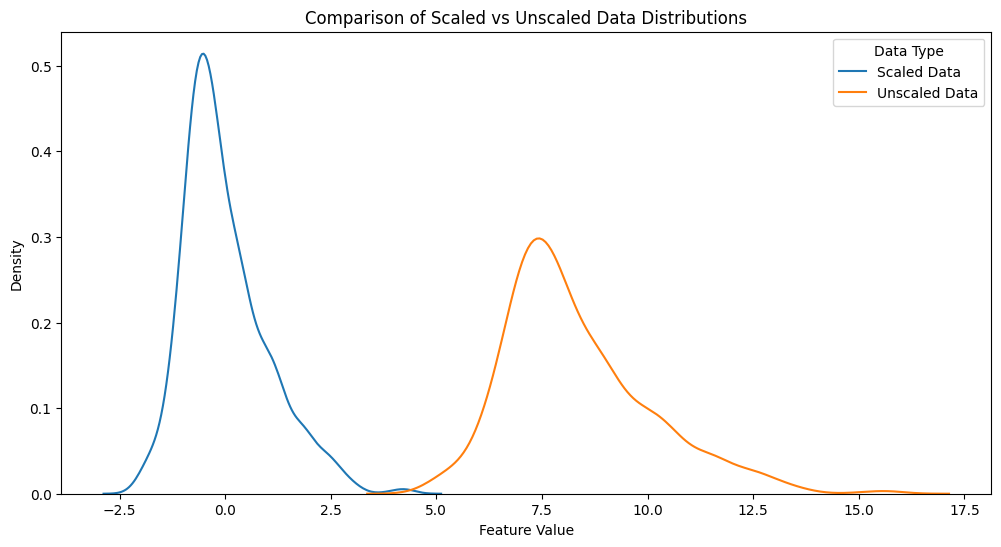

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.title('Comparison of Scaled vs Unscaled Data Distributions')
plt.xlabel('Feature Value')
plt.ylabel('Density')
sns.kdeplot(X_train_scaled[:, 0], label='Scaled Data') 
sns.kdeplot(X_train.iloc[:, 0], label='Unscaled Data')
plt.legend(title='Data Type')
plt.show()


### Models
### Models Description

- **Linear Regression**:
  - A simple yet powerful regression algorithm that predicts a continuous dependent variable based on the values of one or more independent variables. It assumes a linear relationship between the input and output.

- **Random Forest**:
  - An ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the mean prediction of the individual trees. It is highly effective for classification and regression tasks and provides a good indicator of feature importance.

- **Logistic Regression**:
  - Despite its name, logistic regression is used for binary classification rather than regression. It estimates probabilities using a logistic function, which is particularly useful for cases where you need to provide a probability of class membership, such as whether an email is spam.

- **Decision Tree**:
  - A decision support tool that uses a tree-like graph of decisions and their possible consequences. It is simple to understand and interpret, and is useful for both classification and regression tasks.

- **K-Nearest Neighbors (KNN)**:
  - A non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether KNN is used for classification (the most common class among the k-nearest neighbors) or regression (the average of the values of the k-nearest neighbors).

- **Linear Discriminant Analysis (LDA)**:
  - A classification and dimensionality reduction technique, which assumes data is Gaussian and tries to model the difference between the classes of data. LDA is particularly useful when you need to find a linear combination of features that characterizes or separates two or more classes.

- **Gaussian Naive Bayes**:
  - A probabilistic classifier based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of features. It works well in cases where dimensionality of the input is high, relative to the amount of data.

- **Support Vector Machine (SVM)**:
  - A powerful classifier that works both on linear and non-linear problems. It creates a line or a hyperplane which separates the data into classes.



In [69]:

# Define and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
    
}

### Metrics Description

- **Mean Squared Error (MSE)**:
  - Represents the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk metric corresponding to the expected value of the squared error loss.

- **Mean Absolute Error (MAE)**:
  - Measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

- **Root Mean Squared Error (RMSE)**:
  - The square root of the mean of the square of all of the error. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

- **R² Score (Coefficient of Determination)**:
  - Provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model. Values closer to 1.0 are generally better, indicating that more variance is explained by the model.

- **Accuracy**:
  - Used only for classification models, it measures the ratio of correctly predicted observation to the total observations. It is a useful metric for comparing the performance of classification models, particularly when the classes are well balanced.



In [178]:

# Prepare data for plotting
results_scaled = {metric: [] for metric in ['MSE', 'MAE', 'RMSE', 'R²', 'Accuracy']}
results_unscaled = {metric: [] for metric in ['MSE', 'MAE', 'RMSE', 'R²', 'Accuracy']}
cv_results_scaled = {metric: [] for metric in ['MSE', 'MAE', 'RMSE', 'R²', 'Accuracy']}
cv_results_unscaled = {metric: [] for metric in ['MSE', 'MAE', 'RMSE', 'R²', 'Accuracy']}
model_names = []

# Number of folds for cross-validation
n_folds = 9

# Scorers setup
scorers = {
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'R²': 'r2',
    'Accuracy': 'accuracy'
}

# Evaluate models and store results
for name, model in models.items():
    model_names.append(name)
    
    # Fit and predict with scaled data
    model.fit(X_train_scaled, y_train)
    predictions_scaled = model.predict(X_test_scaled)
    mse_scaled = mean_squared_error(y_test, predictions_scaled)
    mae_scaled = mean_absolute_error(y_test, predictions_scaled)
    rmse_scaled = np.sqrt(mse_scaled)
    r2_scaled = r2_score(y_test, predictions_scaled)
    acc_scaled = accuracy_score(y_test, predictions_scaled) if hasattr(model, 'predict_proba') else None

    # Print results for scaled data
    print(f"\nScaled Data - {name}:")
    print(f"  RMSE: {rmse_scaled:.3f}\n  MSE: {mse_scaled:.3f}\n  MAE: {mae_scaled:.3f}\n  R²: {r2_scaled:.3f}\n  Accuracy: {acc_scaled if acc_scaled is not None else 'N/A'}")
    print(100 * '.')


    # Store individual results
    results_scaled['MSE'].append(mse_scaled)
    results_scaled['MAE'].append(mae_scaled)
    results_scaled['RMSE'].append(rmse_scaled)
    results_scaled['R²'].append(r2_scaled)
    results_scaled['Accuracy'].append(acc_scaled if acc_scaled is not None else np.nan)

    # Cross-validation for scaled data
    for metric, scorer in scorers.items():
        if metric == 'Accuracy' and not hasattr(model, 'predict_proba'):
            continue
        cv_result = cross_val_score(model, X_train_scaled, y_train, cv=n_folds, scoring=scorer)
        cv_results_scaled[metric].append(np.mean(cv_result))

    # Fit and predict with unscaled data
    model.fit(X_train, y_train)
    predictions_unscaled = model.predict(X_test)
    mse_unscaled = mean_squared_error(y_test, predictions_unscaled)
    mae_unscaled = mean_absolute_error(y_test, predictions_unscaled)
    rmse_unscaled = np.sqrt(mse_unscaled)
    r2_unscaled = r2_score(y_test, predictions_unscaled)
    acc_unscaled = accuracy_score(y_test, predictions_unscaled) if hasattr(model, 'predict_proba') else None

    # Print results for unscaled data
    print(f"Unscaled Data - {name}:")
    print(f"  RMSE: {rmse_unscaled:.3f}\n  MSE: {mse_unscaled:.3f}\n  MAE: {mae_unscaled:.3f}\n  R²: {r2_unscaled:.3f}\n  Accuracy: {acc_unscaled if acc_unscaled is not None else 'N/A'}")


    # Store individual results
    results_unscaled['MSE'].append(mse_unscaled)
    results_unscaled['MAE'].append(mae_unscaled)
    results_unscaled['RMSE'].append(rmse_unscaled)
    results_unscaled['R²'].append(r2_unscaled)
    results_unscaled['Accuracy'].append(acc_unscaled if acc_unscaled is not None else np.nan)

    # Cross-validation for unscaled data
    for metric, scorer in scorers.items():
        if metric == 'Accuracy' and not hasattr(model, 'predict_proba'):
            continue
        cv_result = cross_val_score(model, X_train, y_train, cv=n_folds, scoring=scorer)
        cv_results_unscaled[metric].append(np.mean(cv_result))
    print(100 * '.')
    # Print CV results for scaled data
    print(f"Scaled Data - {name} Cross-Validation:")
    for metric in scorers.keys():
        if metric == 'Accuracy' and not hasattr(model, 'predict_proba'):
            continue
        print(f"  {metric}: {cv_results_scaled[metric][-1]:.3f}")
    print(100 * '.')
    
    # Print CV results for unscaled data
    print(f"Unscaled Data - {name} Cross-Validation:")
    for metric in scorers.keys():
        if metric == 'Accuracy' and not hasattr(model, 'predict_proba'):
            continue
        print(f"  {metric}: {cv_results_unscaled[metric][-1]:.3f}")
    print(100 * '-')


Scaled Data - Linear Regression:
  RMSE: 0.625
  MSE: 0.390
  MAE: 0.504
  R²: 0.403
  Accuracy: N/A
....................................................................................................
Unscaled Data - Linear Regression:
  RMSE: 0.625
  MSE: 0.390
  MAE: 0.504
  R²: 0.403
  Accuracy: N/A
....................................................................................................
Scaled Data - Linear Regression Cross-Validation:
  RMSE: 0.658
  MSE: 0.435
  MAE: 0.505
  R²: 0.329
....................................................................................................
Unscaled Data - Linear Regression Cross-Validation:
  RMSE: 0.658
  MSE: 0.435
  MAE: 0.505
  R²: 0.329
----------------------------------------------------------------------------------------------------

Scaled Data - Random Forest:
  RMSE: 0.548
  MSE: 0.301
  MAE: 0.422
  R²: 0.540
  Accuracy: N/A
.......................................................................................

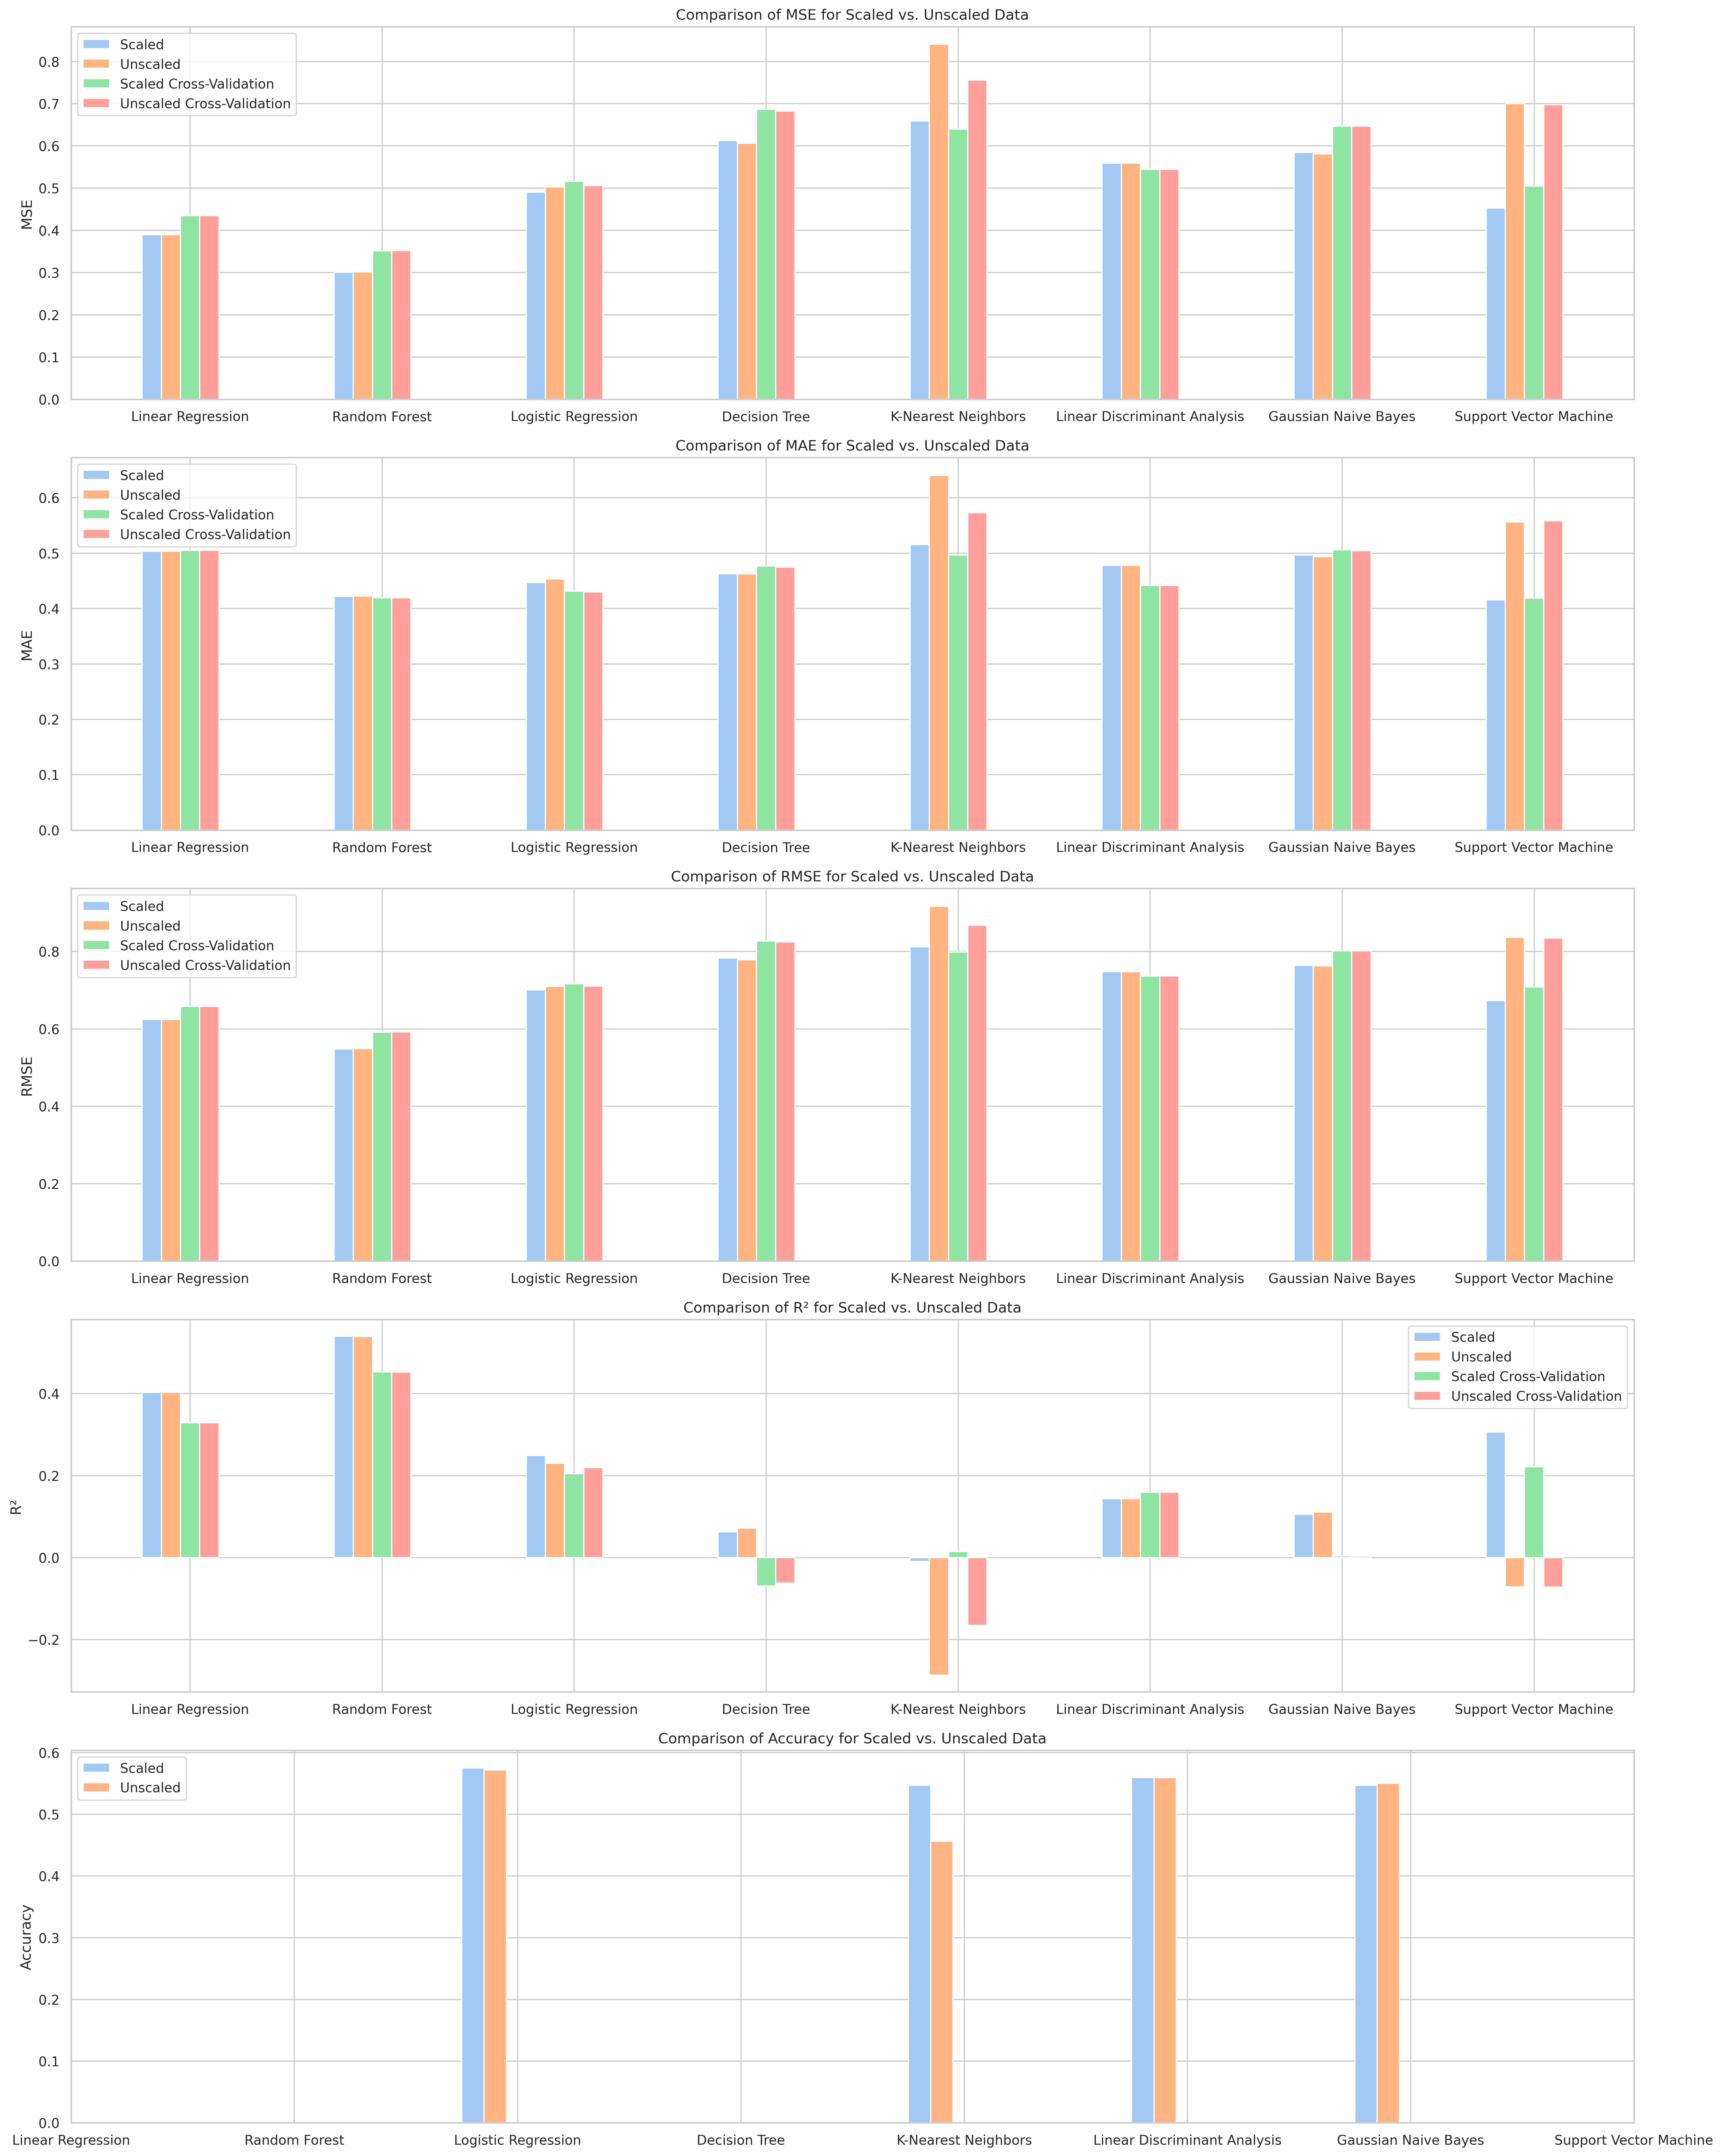

In [179]:
metrics = ['MSE', 'MAE', 'RMSE', 'R²', 'Accuracy']
num_metrics = len(metrics)
fig, axes = plt.subplots(nrows=num_metrics, figsize=(20, num_metrics * 5), dpi=300)

for i, metric in enumerate(metrics):
    ax = axes[i]
    indices = range(len(model_names))
    ax.bar([x - 0.2 for x in indices], results_scaled[metric], width=0.1, label='Scaled')
    ax.bar([x - 0.1 for x in indices], results_unscaled[metric], width=0.1, label='Unscaled')
    if metric != 'Accuracy':
        ax.bar([x + 0.0 for x in indices], cv_results_scaled[metric], width=0.1, label='Scaled Cross-Validation')
        ax.bar([x + 0.1 for x in indices], cv_results_unscaled[metric], width=0.1, label='Unscaled Cross-Validation')

    ax.set_xticks(indices)
    ax.set_xticklabels(model_names)
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric} for Scaled vs. Unscaled Data')
    ax.legend()

plt.tight_layout()
plt.show()

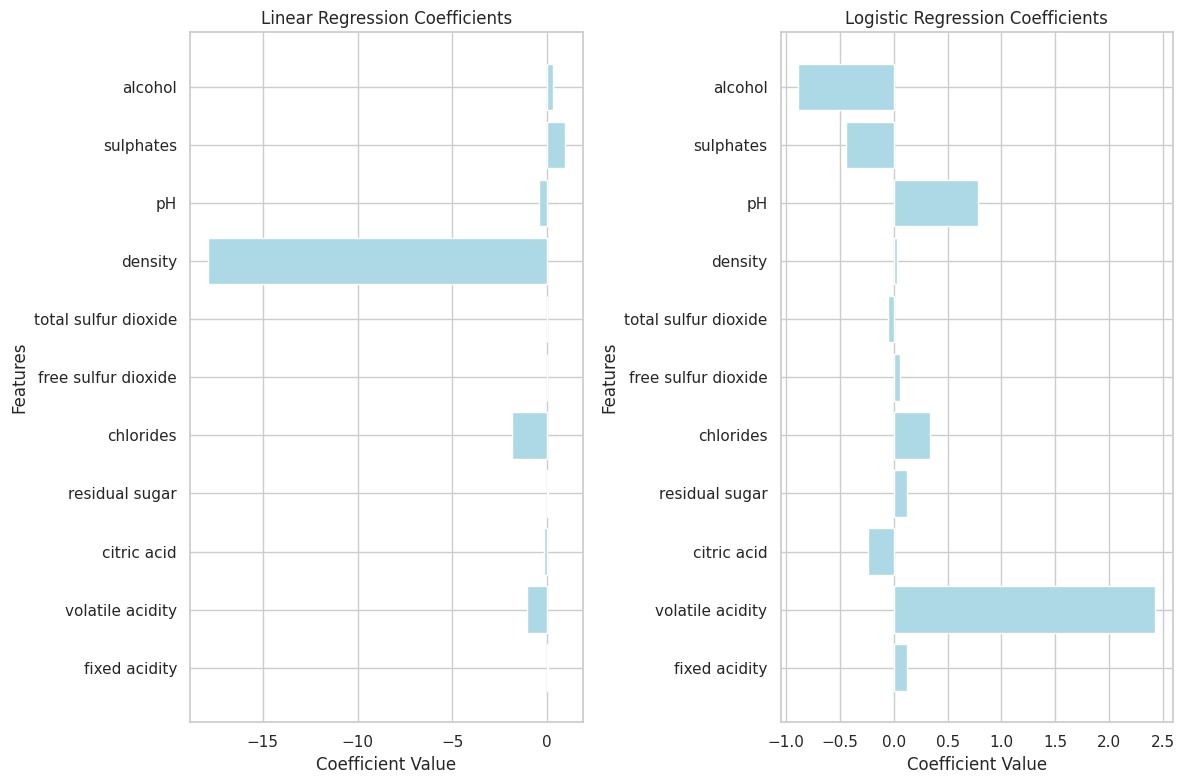

In [186]:
import matplotlib.pyplot as plt

models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(max_iter=10000) 
}

plt.figure(figsize=(12, 8))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    coefficients = model.coef_[0] if len(model.coef_.shape) > 1 else model.coef_ 
    
    plt.subplot(1, len(models), idx + 1)
    plt.barh(X.columns, coefficients, color='lightblue')
    plt.title(f'{name} Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')

plt.tight_layout()
plt.show()


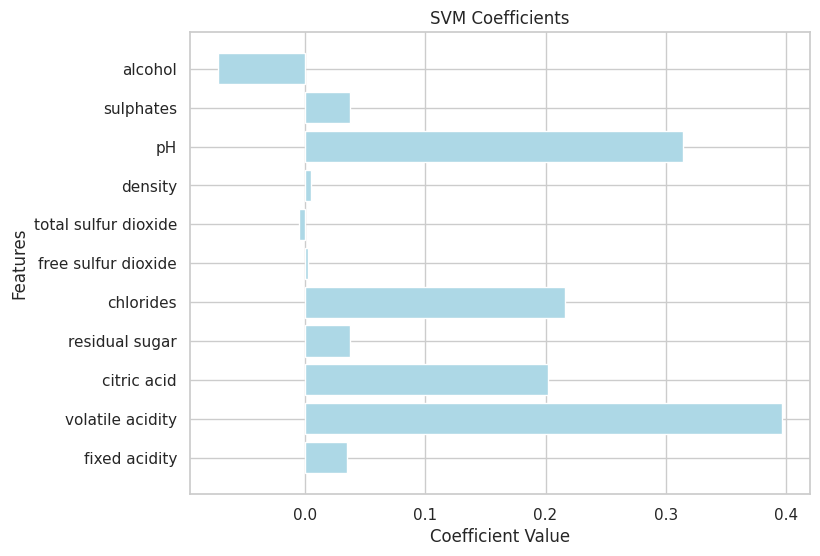

In [181]:
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)
svm_coefficients = svm_model.coef_[0]

plt.figure(figsize=(8, 6))
plt.barh(X.columns, svm_coefficients, color='lightblue')
plt.title('SVM Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()
